In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import shap
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score , roc_auc_score, accuracy_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/insurance-cleaned-data/cleaned_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70573 entries, 0 to 70572
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   UnderwrittenCoverID       70573 non-null  int64  
 1   PolicyID                  70573 non-null  int64  
 2   TransactionMonth          70573 non-null  object 
 3   IsVATRegistered           70573 non-null  bool   
 4   Citizenship               70573 non-null  object 
 5   LegalType                 70573 non-null  object 
 6   Title                     70573 non-null  object 
 7   Language                  70573 non-null  object 
 8   Bank                      70573 non-null  object 
 9   AccountType               70573 non-null  object 
 10  MaritalStatus             70573 non-null  object 
 11  Gender                    70573 non-null  object 
 12  Country                   70573 non-null  object 
 13  Province                  70573 non-null  object 
 14  Postal

In [3]:
df["Model"].value_counts()

Model
QUANTUM 2.7 SESFIKILE 16s         12837
QUANTUM 2.7 SESFIKILE 14s         11062
QUANTUM 2.7 SESFIKILE 15s          9202
QUANTUM 2.5 D-4D SESFIKILE 16s     7318
HiACE SIYAYA                       4750
                                  ...  
SPRINTER 519 CDi XL F/C P/V          11
50C15V12 F/C P/V                     10
P 94LA 4X2 NA T/T C/C                 9
SPRINTER 519 CDi F/C C/C              8
QUANTUM 2.7 F/C P/V                   8
Name: count, Length: 95, dtype: int64

In [4]:
df["YearOld"] = 2025 - df["RegistrationYear"]


<Axes: xlabel='TotalPremium', ylabel='MainCrestaZone'>

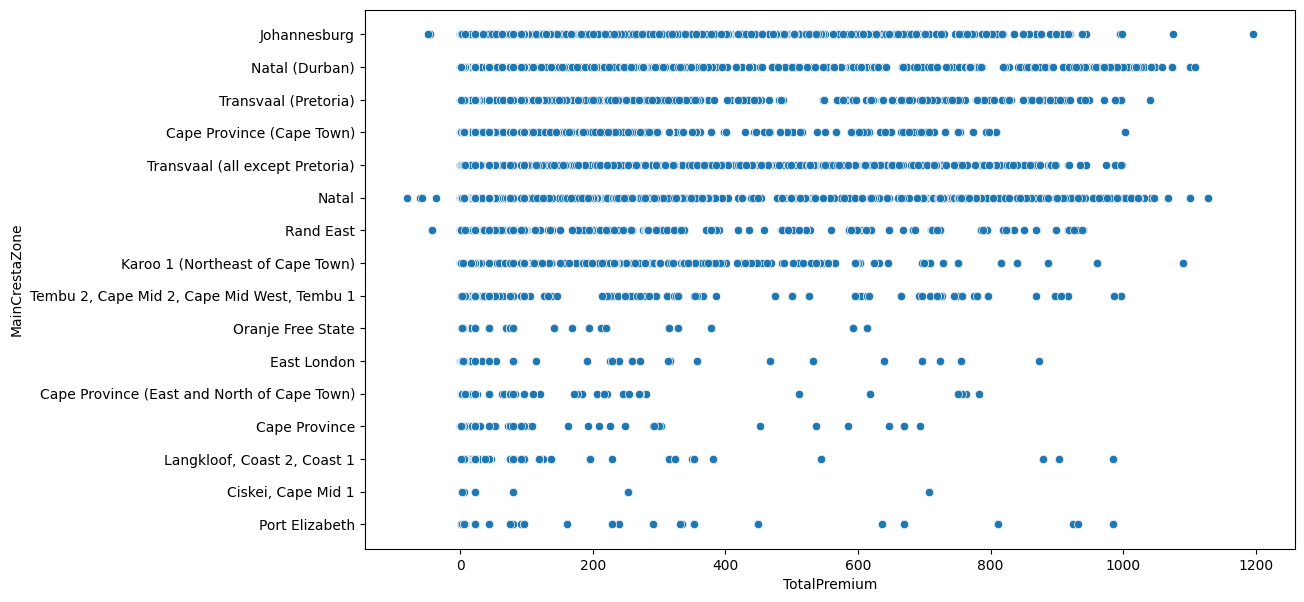

In [5]:
plt.figure(figsize=(12,7))
sns.scatterplot(y= df["MainCrestaZone"] ,x = df["TotalPremium"] )

In [6]:
df["SubCrestaZone"].value_counts()

SubCrestaZone
Johannesburg            13107
Durban                   7804
Northeast of CT          6341
Transvaal North          5669
Transvaal North West     4619
Pretoria                 4340
North Coast              4228
Cape Town                3880
Transvaal South          3671
Transvaal East           2557
Bushveld                 2349
Rand East                1757
Natal 3                  1644
South Coast              1545
Zululand                  919
Rand West                 918
Tembu 1                   647
Natal 2                   524
East London               423
Langkloof                 369
East and North of         365
Tembu 2                   351
Transvaal South East      324
Pondo                     306
Port Elizabeth            264
Transvaal South West      246
Highveld                  242
OFS North 1 and           194
Cape Mid West             187
Transvaal Mid West        145
Karoo 1                   117
Kalahari                  112
Vaalhartz                 

<Axes: xlabel='TotalPremium', ylabel='SubCrestaZone'>

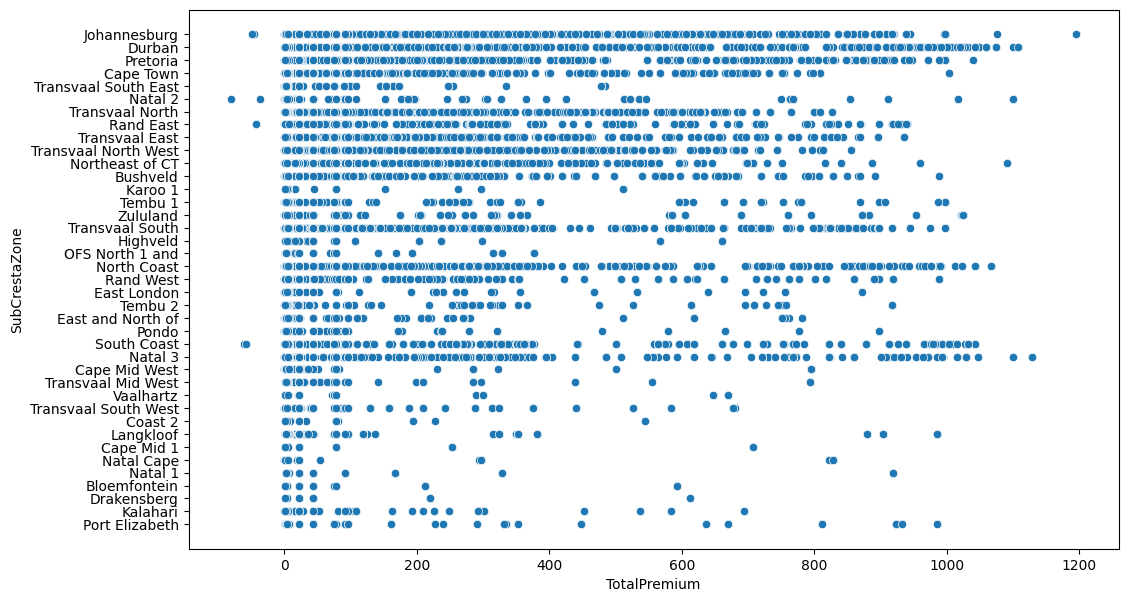

In [7]:
plt.figure(figsize=(12,7))
sns.scatterplot(y= df["SubCrestaZone"] ,x = df["TotalPremium"] )

<Axes: xlabel='TotalPremium', ylabel='TermFrequency'>

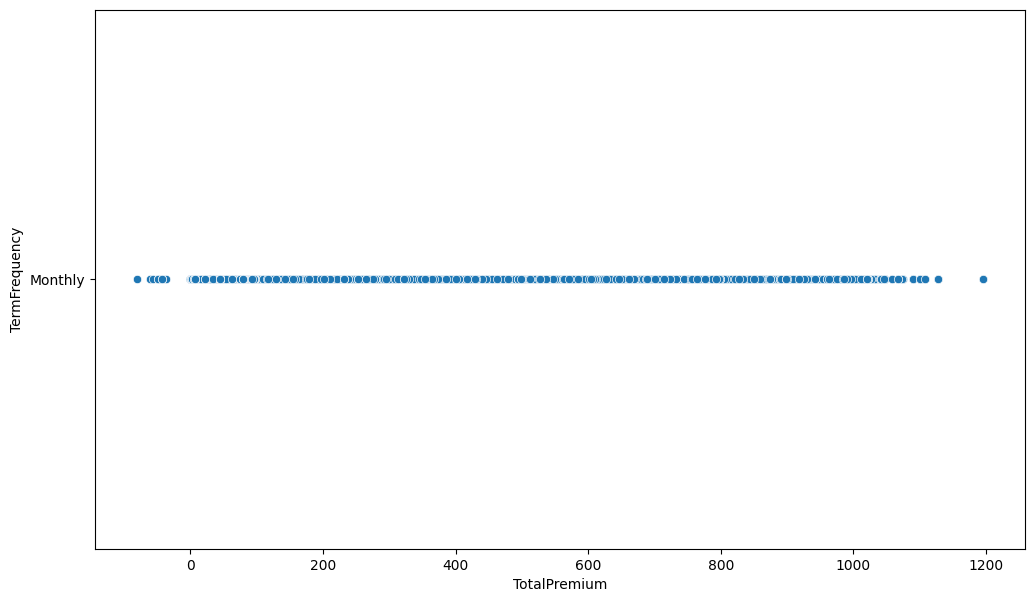

In [8]:
plt.figure(figsize=(12,7))
sns.scatterplot(y= df["TermFrequency"] ,x = df["TotalPremium"] )

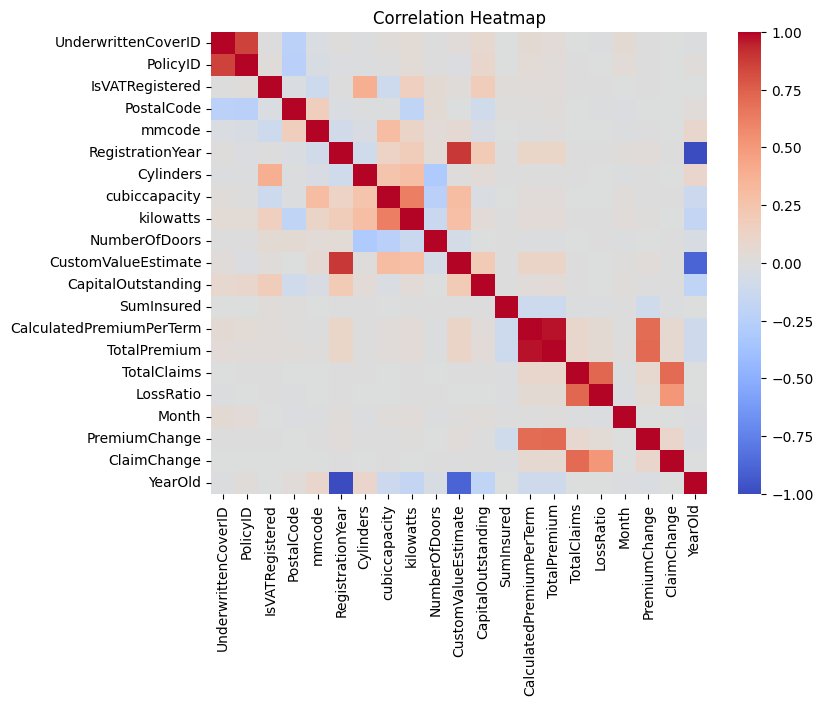

In [9]:
corr = df.corr(numeric_only=True)  # Only numeric columns
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [10]:
corre = df["SumInsured"].corr(df["TotalPremium"])

<Axes: xlabel='TotalPremium', ylabel='SumInsured'>

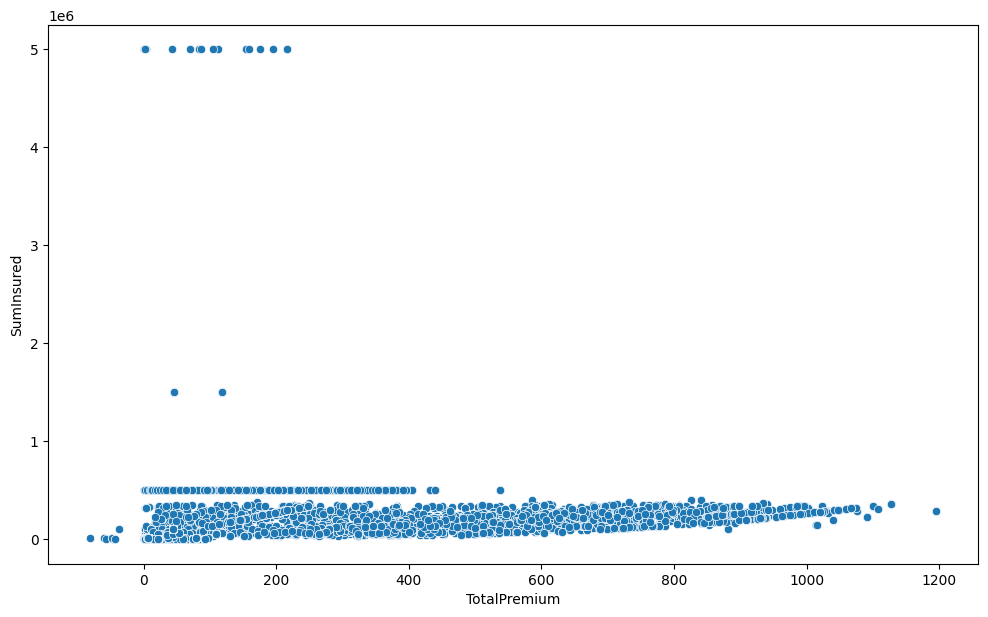

In [11]:
plt.figure(figsize=(12,7))
sns.scatterplot(y= df["SumInsured"] ,x = df["TotalPremium"] )

In [12]:
df["MainCrestaZone"].value_counts()

MainCrestaZone
Transvaal (all except Pretoria)                20740
Johannesburg                                   13107
Natal                                           9277
Natal (Durban)                                  7804
Karoo 1 (Northeast of Cape Town)                6458
Transvaal (Pretoria)                            4340
Cape Province (Cape Town)                       3880
Rand East                                       1757
Tembu 2, Cape Mid 2, Cape Mid West, Tembu 1     1185
East London                                      423
Langkloof, Coast 2, Coast 1                      423
Cape Province (East and North of Cape Town)      365
Oranje Free State                                294
Port Elizabeth                                   264
Cape Province                                    202
Ciskei, Cape Mid 1                                54
Name: count, dtype: int64

In [13]:
df["Product"].value_counts()

Product
Mobility Commercial Cover: Monthly    68411
Mobility Metered Taxis: Monthly        1926
Bridge Taxi Finance: Monthly            236
Name: count, dtype: int64

In [14]:
target = "TotalPremium"
features = [
    "Month", "Gender", "Province", "CustomValueEstimate", "VehicleType",
    "PostalCode", "MainCrestaZone", "SubCrestaZone", "Model", "YearOld", "ExcessSelected"
]
catcols = [     "Month", "Gender", "Province", "VehicleType",
    "PostalCode", "MainCrestaZone", "SubCrestaZone", "Model", "ExcessSelected"
]

In [15]:
X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
preprocessor  =make_column_transformer(
    (make_pipeline(SimpleImputer(strategy='most_frequent'),
                   OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
     catcols))

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

In [ ]:
for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

   
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{name} Evaluation")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.2f}")

    print(f"SHAP summary plot for {name}")


    X_test_transformed = pipeline.named_steps["preprocessor"].transform(X_test)

    fitted_model = pipeline.named_steps["model"]

 
    if name in ["Random Forest", "XGBoost"]:
        explainer = shap.Explainer(fitted_model)  # TreeExplainer
    else:
        explainer = shap.Explainer(fitted_model, X_test_transformed)  # LinearExplainer

    feature_names = pipeline.named_steps["preprocessor"].get_feature_names_out()
    shap_values = explainer(X_test_transformed)
    shap.summary_plot(shap_values, X_test_transformed , feature_names=feature_names)


| Model            | RMSE (Severity) | R² (Severity) | AUC (Prob) | Accuracy (Prob) |
| ---------------- | --------------- | ------------- | ---------- | --------------- |
| LinearRegression | XXXX            | XXXX          | N/A        | N/A             |
| RandomForest     | XXXX            | XXXX          | XX.X       | XX.X%           |
| XGBoost          | XXXX            | XXXX          | XX.X       | XX.X%           |